In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick


In [70]:
#DESCRIBE DATA SOURCE AND WHAT THE DATA IS


file_path = 'env_waseleeos_page_spreadsheet.xlsx'

df = pd.read_excel(file_path, sheet_name = "Sheet1")

print(df.head())

    Country     2012       2013       2014     2015     2016     2017  \
0   Belgium   329598   269939.0   260391.0   268985   277898   292234   
1  Bulgaria    53144    56700.0    65595.0    67945    72304    74832   
2   Czechia   168840   181886.0   179328.0   182025   187487   203572   
3   Denmark   141925   138437.0   152358.0   154842   158595   172060   
4   Germany  1776492  1609232.0  1713902.0  1897480  1957989  2081223   

      2018       2019       2020       2021  
0   311125   341015.0   334789.0   331069.0  
1    81869    89130.0    87184.0   109781.0  
2   196918   236297.0   263202.0   301537.0  
3   175821   207043.0   228890.0   250861.0  
4  2375643  2590244.0  2847926.0  3096159.0  


In [123]:
#Subsecting the data I want to use for the graphs using pandas method
#FR and DE
FR_DE_POM = df[df["Country"].isin(["Germany", "France"])]
FR_DE_POM = FR_DE_POM.set_index('Country')

print(FR_DE_POM.head())
#OTHERS

            2012       2013       2014     2015     2016     2017     2018  \
Country                                                                      
Germany  1776492  1609232.0  1713902.0  1897480  1957989  2081223  2375643   
France   1602702  1554732.0  1554305.0  1676384  1748258  1880274  1928995   

              2019       2020       2021  
Country                                   
Germany  2590244.0  2847926.0  3096159.0  
France   2094364.0  2179743.0  2473422.0  


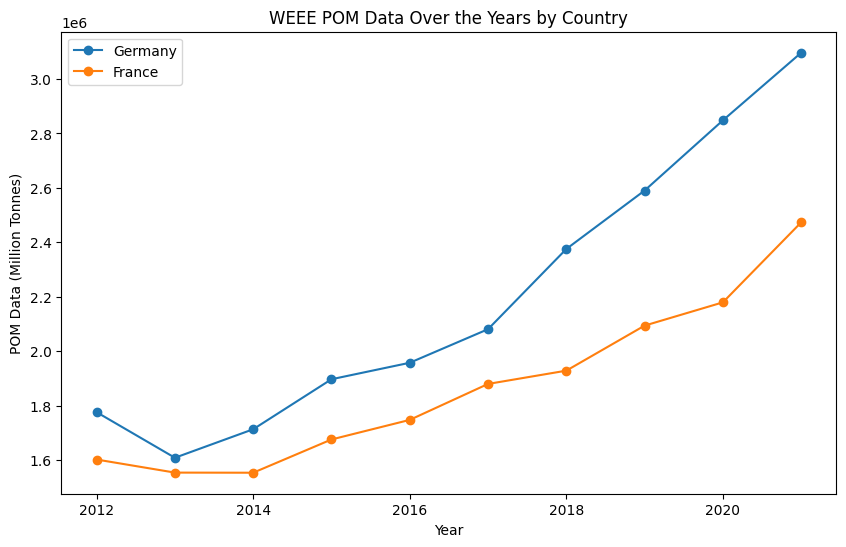

In [137]:
#Setting Country column as index

plt.figure(figsize=(10, 6))

plt.plot(FR_DE_POM.columns, FR_DE_POM.loc["Germany"], marker ="o", label = "Germany")
plt.plot(FR_DE_POM.columns, FR_DE_POM.loc["France"], marker ="o", label = "France")

plt.title('WEEE POM Data Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('POM Data (Million Tonnes)')
#plt.xticks(rotation=45)

plt.legend()
plt.show()





In [141]:
#NOW I AM IMPORTING WEEE COLLECTED DATA
file_path = 'WEEE_collected.xlsx'

df_2 = pd.read_excel(file_path, sheet_name = "Sheet1")

print(df_2.head())

    Country    2012      2013    2014    2015      2016    2017    2018  \
0   Belgium  116458  120365.0  116345  118545  127680.0  124011  138218   
1  Bulgaria   38431   35162.0   42310   61987   61481.0   54493   52616   
2   Czechia   53685   54215.0   58585   74288       NaN  106656   93083   
3   Denmark   76200   72080.0   71557   72482   71209.0   69770   71198   
4   Germany  690711  727998.0  722968  721870  782214.0  836907  853125   

     2019     2020       2021  
0  150419   159696   169460.0  
1   61778    75573    93239.0  
2  101319   118316   133421.0  
3   73035    78894    76732.0  
4  947067  1037019  1006370.0  


In [143]:
#AGAIN I WANT TO SUBSET FOR GERMANY AND FRANCE
FR_DE_COL = df_2[df_2["Country"].isin(["Germany", "France"])]
FR_DE_COL = FR_DE_COL.set_index('Country')

print(C.head())

           2012      2013    2014    2015      2016    2017    2018    2019  \
Country                                                                       
Germany  690711  727998.0  722968  721870  782214.0  836907  853125  947067   
France   470556  479694.0  522793  617401  721949.0  742333  814385  846229   

            2020       2021  
Country                      
Germany  1037019  1006370.0  
France    835141   993987.0  


In [145]:
#Dividing collected data by POM data to get the percetage of collected data over the years

percentage_collected = FR_DE_COL / FR_DE_POM * 100

print(percentage_collected)

              2012       2013       2014       2015       2016       2017  \
Country                                                                     
Germany  38.880614  45.238847  42.182575  38.043616  39.949867  40.212269   
France   29.360168  30.853806  33.635162  36.829330  41.295335  39.480044   

              2018       2019       2020       2021  
Country                                              
Germany  35.911330  36.562849  36.413130  32.503822  
France   42.218098  40.405059  38.313737  40.186713  


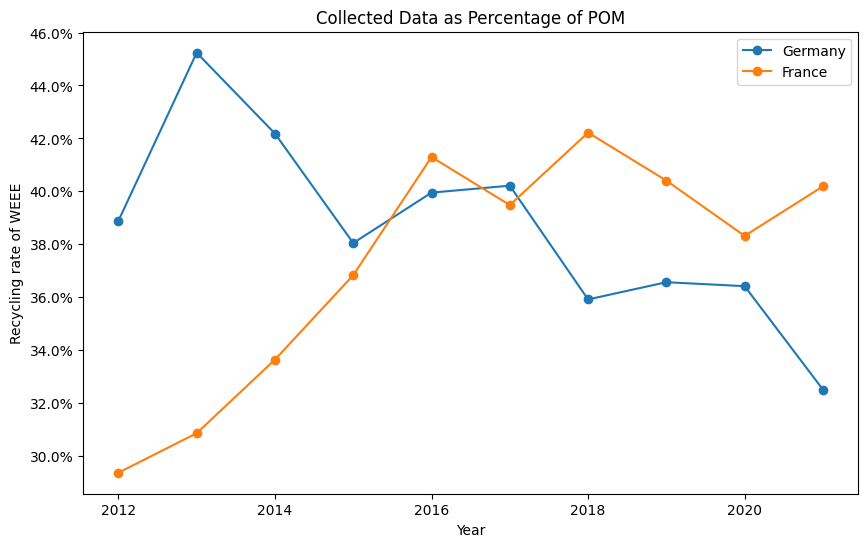

In [153]:
plt.figure(figsize=(10, 6))

plt.plot(percentage_collected.columns, percentage_collected.loc["Germany"], marker ="o", label = "Germany")
plt.plot(percentage_collected.columns, percentage_collected.loc["France"], marker ="o", label = "France")

plt.title('Collected Data as Percentage of POM')
plt.xlabel('Year')
plt.ylabel('Recycling rate of WEEE')
#plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend()
plt.show()